In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv


In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(1)

In [3]:
train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")

In [4]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.shape

(42000, 785)

In [6]:
test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.shape

(28000, 784)

In [8]:
Y_train = train["label"]
X_train = train.drop(labels=["label"], axis=1)
del train
Y_train.head(5)

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [9]:
X_train.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [10]:
Y_train.isnull().sum()

0

In [11]:
X_train = X_train/255.
test = test/255.

In [12]:
X_train = X_train.values.reshape(42000,28,28,1)
test = test.values.reshape(28000,28,28,1)


In [13]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train, num_classes=10)
Y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [14]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=2)

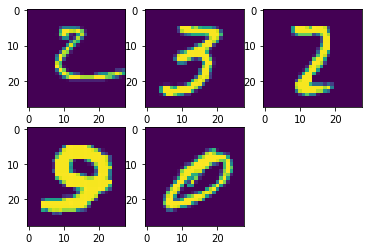

In [15]:
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(X_train[i][:,:,0])

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, MaxPool2D, Conv2D, Dense, Input
def create_model():
    def add_conv_block(model,num_filters):
        model.add(Conv2D(num_filters, kernel_size=(3,3), padding='same', activation='relu'))
        model.add(Conv2D(num_filters, kernel_size=(3,3), padding='same', activation='relu'))
        model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
        model.add(Dropout(0.25))
        return model
    
    model = Sequential()
    model.add(Input(shape=(28,28,1)))
    model = add_conv_block(model,32)
    model = add_conv_block(model,64)
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model
    
model = create_model()
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)         

In [27]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

model.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

In [28]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                           patience=2,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00001)

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=10, 
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.1,
                            shear_range=0.2)
datagen.fit(X_train)

In [30]:
history = model.fit_generator(
            datagen.flow(X_train, Y_train, batch_size=84), 
            validation_data=(X_val, Y_val), 
            epochs=30, 
            steps_per_epoch=X_train.shape[0]//84,
            callbacks=[learning_rate_reduction])

Epoch 1/20
400/400 [==============================] - 14s 34ms/step - loss: 0.4872 - accuracy: 0.8403 - val_loss: 0.0729 - val_accuracy: 0.9777 - lr: 0.0010
Epoch 2/20
400/400 [==============================] - 13s 32ms/step - loss: 0.1530 - accuracy: 0.9547 - val_loss: 0.0464 - val_accuracy: 0.9851 - lr: 0.0010
Epoch 3/20
400/400 [==============================] - 13s 32ms/step - loss: 0.1064 - accuracy: 0.9678 - val_loss: 0.0381 - val_accuracy: 0.9877 - lr: 0.0010
Epoch 4/20
400/400 [==============================] - 13s 31ms/step - loss: 0.0888 - accuracy: 0.9732 - val_loss: 0.0335 - val_accuracy: 0.9902 - lr: 0.0010
Epoch 5/20
400/400 [==============================] - 14s 35ms/step - loss: 0.0787 - accuracy: 0.9765 - val_loss: 0.0328 - val_accuracy: 0.9905 - lr: 0.0010
Epoch 6/20
400/400 [==============================] - 13s 31ms/step - loss: 0.0712 - accuracy: 0.9790 - val_loss: 0.0318 - val_accuracy: 0.9910 - lr: 0.0010
Epoch 7/20
400/400 [==============================] - 13s 

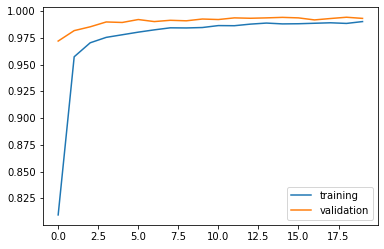

In [22]:
accs = history.history['accuracy']
val_accs = history.history['val_accuracy']
plt.plot(range(len(accs)),accs,label='training')
plt.plot(range(len(val_accs)),val_accs,label='validation')
plt.legend()
plt.show()

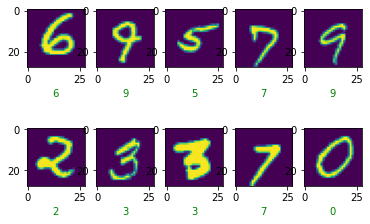

In [23]:
pred = model.predict(X_val)
class_names =[]
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_val[i][:,:,0])
    col = 'green' if np.argmax(Y_val[i])==np.argmax(pred[i]) else 'red'
    plt.xlabel(np.argmax(pred[i]), color=col)
    

In [24]:
results = model.predict(test)
results = np.argmax(results, axis=1)
results = pd.Series(results, name="Label")

In [25]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results], axis=1)
submission.to_csv("digit_recognition.csv", index=False)